In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
control_df = pd.read_csv('Moreno - control.csv')
control_df

,Measurement,Time,Number,Mean,SD,Score Change,Percentage Change,Comparison with baseline assessment
0,PHQ-9,Baseline,86,17.58,5.12,NaN,NaN,NaN
1,NaN,3 Months,74,9.85,6.31,7.33,44.0,<0.001
2,NaN,6 Months,75,7.59,6.82,9.99,57.0,<0.001
3,MADRS,Baseline,85,26.86,8.81,NaN,NaN,NaN
4,NaN,3 Months,67,15.69,11.82,11.17,42.0,<0.001
5,NaN,6 Months,68,13.46,12.57,13.40,50.0,<0.001
6,Q-Les-Q,Baseline,85,0.44,0.12,NaN,NaN,NaN
7,NaN,3 Months,75,0.55,0.17,0.11,25.0,<0.001
8,NaN,6 Months,74,0.64,0.19,0.20,45.0,<0.001
9,SDS,Baseline,86,15.52,6.42,NaN,NaN,NaN


In [58]:
tele_df = pd.read_csv('Moreno - tele.csv')
tele_df

,Measurement,Time,Number,Mean,SD,Score Change,Percentage Change,Comparison with baseline assessment
0,PHQ-9,Baseline,80,18.41,4.50,NaN,NaN,NaN
1,NaN,3 Months,65,8.45,5.45,9.97,54.0,<0.001
2,NaN,6 Months,69,4.94,5.30,13.47,73.0,<0.001
3,MADRS,Baseline,74,29.95,7.59,NaN,NaN,NaN
4,NaN,3 Months,61,16.33,11.75,13.62,45.0,<0.001
5,NaN,6 Months,64,9.52,10.73,20.43,68.0,<0.001
6,Q-Les-Q,Baseline,80,0.43,0.11,NaN,NaN,NaN
7,NaN,3 Months,66,0.59,0.17,0.16,37.0,<0.001
8,NaN,6 Months,70,0.72,0.20,0.29,67.0,<0.001
9,SDS,Baseline,80,17.34,6.63,NaN,NaN,NaN


(0.0, 20.0)

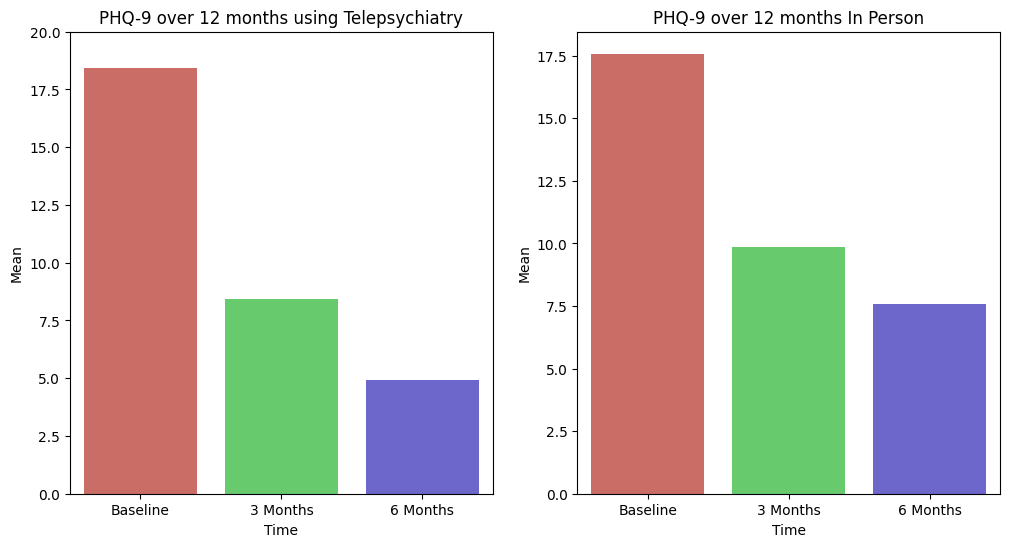

In [36]:
colors = sns.color_palette("hls", 3)

#putting the graphs onto on plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.barplot(tele_df[0:3], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[0])
axes[0].set_title("PHQ-9 over 12 months using Telepsychiatry")
axes[0].set_ylim(0, 20)

sns.barplot(control_df[0:3], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[1])
axes[1].set_title("PHQ-9 over 12 months In Person")
axes[0].set_ylim(0, 20)

(0.0, 30.0)

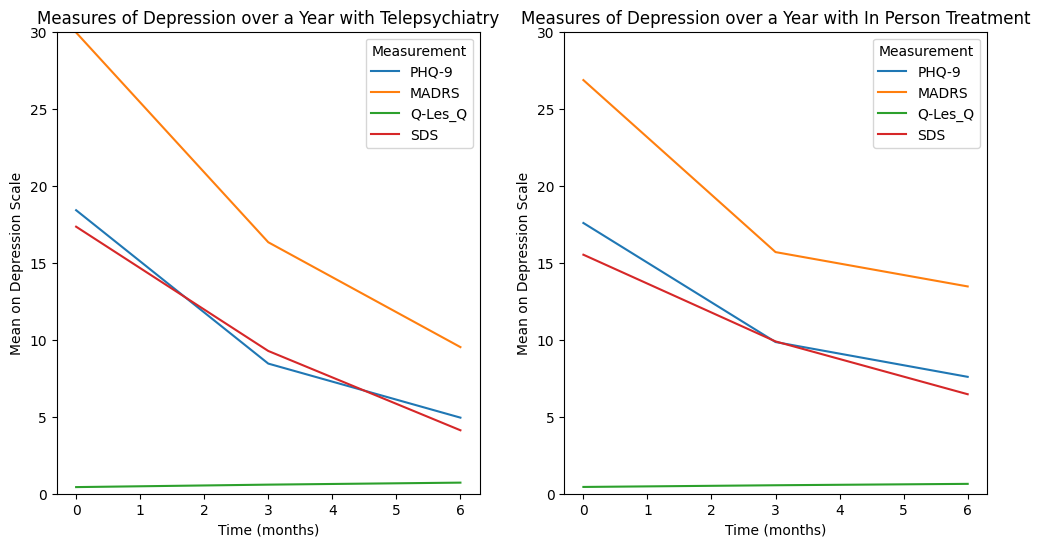

In [60]:
control_df['Time'] = control_df['Time'].replace('Baseline', 0)
control_df['Time'] = control_df['Time'].replace('3 Months', 3)
control_df['Time'] = control_df['Time'].replace('6 Months', 6)

tele_df['Time'] = tele_df['Time'].replace('Baseline', 0)
tele_df['Time'] = tele_df['Time'].replace('3 Months', 3)
tele_df['Time'] = tele_df['Time'].replace('6 Months', 6)

def replace(df, measurement, start, end):
    df.loc[start:end, 'Measurement'] = measurement 
    return df

control_df = replace(control_df, "PHQ-9", 0, 2)
control_df = replace(control_df, "MADRS", 3, 5)
control_df = replace(control_df, "Q-Les_Q", 6, 8)
control_df = replace(control_df, "SDS", 9, 11)

tele_df = replace(tele_df, "PHQ-9", 0, 2)
tele_df = replace(tele_df, "MADRS", 3, 5)
tele_df = replace(tele_df, "Q-Les_Q", 6, 8)
tele_df = replace(tele_df, "SDS", 9, 11)

tele_df.rename(columns={'Time': 'Time (months)', 'Mean': 'Mean on Depression Scale'}, inplace=True)
control_df.rename(columns={'Time': 'Time (months)', 'Mean': 'Mean on Depression Scale'}, inplace=True)

fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(data=tele_df, x="Time (months)", y="Mean on Depression Scale", hue = "Measurement", ax=axes[0])
axes[0].set_title("Measures of Depression over a Year with Telepsychiatry")
axes[0].set_ylim(0, 30)
sns.lineplot(data=control_df, x="Time (months)", y="Mean on Depression Scale", hue = "Measurement", ax=axes[1])
axes[1].set_title("Measures of Depression over a Year with In Person Treatment")
axes[1].set_ylim(0, 30)